# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

#### After cleaning data, how to save a cleaned csv:


import pandas as pd 

df = pd.read_csv('Diseases.csv')

df1 = df[df.DIABETES >1]

df1.to_csv('diabetes-filtered.csv')

#### Or you can chain filtering and exporting to file:


import pandas as pd 

df = pd.read_csv('Diseases.csv')

df[df.DIABETES >1].to_csv('diabetes-filtered.csv')


In [1]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib
from nltk.metrics import edit_distance
import missingno as msno
import pandas_profiling as pp

# Visualization Imports
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import numpy as np


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#Print multiple outputs from 1 cell


In [2]:
# Create two new dataframes
#Set the first column as index

north_df=pd.read_csv('NorthCallCenter.csv', index_col=[0])
south_df=pd.read_csv('SouthCallCenter.csv', index_col=[0])


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
north_df.head()


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [5]:
south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [6]:
north_df.shape

(245, 14)

In [7]:
south_df.shape

(314, 14)

In [8]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 245 non-null    object 
 1   Call Purpose           245 non-null    object 
 2   Time Block             245 non-null    object 
 3   Incoming or Outgoing   245 non-null    object 
 4   Queue                  245 non-null    object 
 5   Rep ID                 245 non-null    object 
 6   Sale                   245 non-null    object 
 7   Lost Call              245 non-null    int64  
 8   Abandoned              245 non-null    int64  
 9   Busy Minutes           245 non-null    int64  
 10  Not Ready Minutes      245 non-null    int64  
 11  Incoming Wait Time     82 non-null     float64
 12  During Call Wait Time  245 non-null    int64  
 13  Calls                  245 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 28.7+ KB


In [9]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 313
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 314 non-null    object 
 1   Call Purpose           314 non-null    object 
 2   Time Block             314 non-null    object 
 3   Incoming or Outgoing   314 non-null    object 
 4   Queue                  314 non-null    object 
 5   Rep ID                 314 non-null    object 
 6   Sale                   314 non-null    object 
 7   Lost Call              314 non-null    int64  
 8   Abandoned              314 non-null    int64  
 9   Busy Minutes           314 non-null    int64  
 10  Not Ready Minutes      314 non-null    int64  
 11  Incoming Wait Time     126 non-null    float64
 12  During Call Wait Time  314 non-null    int64  
 13  Calls                  314 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 36.8+ KB


In [10]:
north_df.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

In [11]:
south_df.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

# Exploratory Data Analysis

**Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:**

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [12]:
# Put your EDA code here

In [13]:
#north_df.nlargest(5, 'Incoming Wait Time')

**How many reps are in each branch?**

In [14]:
north_df['Rep ID'].nunique()

9

In [15]:
north_df['Rep ID'].describe()

count       245
unique        9
top       Brent
freq         37
Name: Rep ID, dtype: object

In [16]:
north_df['Rep ID'].value_counts()

Brent     37
Lilly     30
Duke      29
Todd      29
Joe       26
Cam       24
Xander    24
Andy      23
Amanda    23
Name: Rep ID, dtype: int64

In [17]:
south_df['Rep ID'].nunique()

11

In [18]:
south_df['Rep ID'].describe()

count      314
unique      11
top       Eric
freq        35
Name: Rep ID, dtype: object

In [19]:
south_df['Rep ID'].value_counts()

Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Susan     26
Josh      26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

**What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?**

In [20]:
north_df.describe()

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [21]:
south_df.describe()

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [22]:
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

In [23]:
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

**What is the number of calls taken for each time block?**

In [24]:
north_df['Time Block'].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
5:00 PM     17
1:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [25]:
south_df['Time Block'].value_counts()

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

In [26]:
north_df[["Time Block", "Calls"]].groupby("Time Block").sum()

,Calls
Time Block,
10:00 AM,43
11:00 AM,25
12:00 PM,45
1:00 PM,17
2:00 PM,35
3:00 PM,30
4:00 PM,28
5:00 PM,17
9:00 AM,5


In [27]:
south_df[["Time Block", "Calls"]].groupby("Time Block").sum()

,Calls
Time Block,
10:00 AM,56
11:00 AM,31
12:00 PM,75
1:00 PM,23
2:00 PM,30
3:00 PM,43
4:00 PM,25
5:00 PM,26
9:00 AM,5


### EDA Results

Make note of your results here!

### 1. How many reps are in each branch?



**North Branch:9**

Brent,
Lilly,
Duke, 
Todd,
Joe, 
Xander,
Cam,
Amanda,
Andy,

**South Branch:11**

Eric,
Randy,
Sandy,
Helga,
George,
Kate,
Karl,
Susan,
Josh,
Sharon,
Alice, 


### 2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?



**North Branch Average:**

Busy Minutes-             9.987755


Not Ready Minutes-        1.914286


Incoming Wait Time-       3.048780


During Call Wait Time-    2.967347


**South Branch Average:**

Busy Minutes-             10.054140


Not Ready Minutes-         1.910828


Incoming Wait Time-        3.000000


During Call Wait Time-     3.076433



### 3. What is the number of calls taken for each time block?



**North Branch Calls per time block:**

12:00 PM-    45

10:00 AM -   43

2:00 PM -    35

3:00 PM -    30

4:00 PM -    28

11:00 AM -   25

5:00 PM -    17

1:00 PM -    17

9:00 AM -     5

**South Branch Calls per time block:**

12:00 PM -   75

10:00 AM -   56

3:00 PM  -   43

11:00 AM -   31

2:00 PM  -   30

5:00 PM  -   26

4:00 PM -    25

1:00 PM -    23

9:00 AM  -    5



## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [28]:
# Clean your data here

**Check for missing values**

In [29]:
north_missing = north_df.isna().sum()
north_missing

Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [30]:
#northpct_missing = north_df.isna().mean()

#northpct_missing*100


In [31]:
south_missing = south_df.isna().sum()
south_missing

Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [32]:
#southpct_missing=south_df.isna().mean()
#southpct_missing*100

In [33]:
#south_df.groupby('Incoming or Outgoing')['Incoming Wait Time'].value_counts(dropna=False)

# Counting occurences as well as missing values:

**count of missing values of a column by group:**

In [34]:
north_df.groupby(['Incoming or Outgoing'])['Incoming Wait Time'].apply(lambda x: x.isnull().sum())


Incoming or Outgoing
Incoming      0
Outgoing    163
Name: Incoming Wait Time, dtype: int64

In [35]:
south_df.groupby(['Incoming or Outgoing'])['Incoming Wait Time'].apply(lambda x: x.isnull().sum())


Incoming or Outgoing
Incoming      0
Outgoing    188
Name: Incoming Wait Time, dtype: int64

**All of the null values under incoming wait time correspond with outgoing calls. These values will be filled with 0**

In [36]:
north_df['Incoming Wait Time']=north_df['Incoming Wait Time'].fillna(0)

In [37]:
south_df['Incoming Wait Time']=south_df['Incoming Wait Time'].fillna(0)

In [38]:
#south_df.isna().sum()



**Verifying the filled values with groupby value counts**

In [39]:
south_df.groupby('Incoming or Outgoing')['Incoming Wait Time'].value_counts().unstack()

Incoming Wait Time,0.0,1.0,2.0,3.0,4.0,5.0
Incoming or Outgoing,,,,,,
Incoming,NaN,20.0,28.0,29.0,30.0,19.0
Outgoing,188.0,NaN,NaN,NaN,NaN,NaN


In [40]:
north_df.groupby(['Incoming or Outgoing', 'Incoming Wait Time']).size().unstack(fill_value=0)

Incoming Wait Time,0.0,1.0,2.0,3.0,4.0,5.0
Incoming or Outgoing,,,,,,
Incoming,0,17,16,12,20,17
Outgoing,163,0,0,0,0,0


**Checking for Duplicate rows:**

In [41]:
northduplicate_rows = north_df[north_df.duplicated()]
print("North duplicated rows: ", northduplicate_rows.shape)

North duplicated rows:  (2, 14)


In [42]:
north_df[north_df.duplicated()]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,0.0,2,1


In [43]:
southduplicate_rows = south_df[south_df.duplicated()]
print("South duplicated rows: ", southduplicate_rows.shape)

South duplicated rows:  (3, 14)


In [44]:
south_df[south_df.duplicated()]

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,0.0,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,0.0,4,1


In [45]:
#pd.set_option('display.max_rows', None)

#north_df.duplicated()

#See boolean output for all duplicated rows

In [46]:
#Count duplicate in a DataFrame

north_df.duplicated().sum()

south_df.duplicated().sum()

2

3

## Make a copy of data sets and remove duplicated rows 

In [47]:
north_df_copy=north_df.copy()
south_df_copy=south_df.copy()

In [48]:
north_df_copy=north_df_copy.drop_duplicates()

In [49]:
south_df_copy=south_df_copy.drop_duplicates()

In [50]:
north_df_copy.duplicated().sum()

0

In [51]:
south_df_copy.duplicated().sum()

0

In [52]:
north_df_copy.info()
south_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 244
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 243 non-null    object 
 1   Call Purpose           243 non-null    object 
 2   Time Block             243 non-null    object 
 3   Incoming or Outgoing   243 non-null    object 
 4   Queue                  243 non-null    object 
 5   Rep ID                 243 non-null    object 
 6   Sale                   243 non-null    object 
 7   Lost Call              243 non-null    int64  
 8   Abandoned              243 non-null    int64  
 9   Busy Minutes           243 non-null    int64  
 10  Not Ready Minutes      243 non-null    int64  
 11  Incoming Wait Time     243 non-null    float64
 12  During Call Wait Time  243 non-null    int64  
 13  Calls                  243 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 28.5+ KB


# Side-note-Get count of Missing values of rows  in pandas python:


Method 1: north_df.isnull().sum(axis = 1)**


Method 2: for i in range(len(north_df.index)) :
    print("Nan in row ", i , " : " ,  north_df.iloc[i].isnull().sum())

**Rectifying duplicate 'Yes' values in North data set**

In [53]:
north_df_copy['Sale'].value_counts()

NO      232
YES      10
YES       1
Name: Sale, dtype: int64

In [54]:
north_df_copy['Sale']=north_df_copy['Sale'].str.strip()

In [55]:
north_df_copy['Sale'].value_counts()

NO     232
YES     11
Name: Sale, dtype: int64

**Used .strip to remove spaces at the beginning and at the end of the string. The values were the same in terms of casing, so the difference appeared to be within the leading and trailimg whitespaces, which ultimately proved to be correct.**

**Unnecessary data**

In [56]:
#North- columns with a high percentage of the same value
num_rows = len(north_df_copy.index)
low_information_cols = [] #

for col in north_df_copy.columns:
    cnts = north_df_copy[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
North    243
Name: Branch, dtype: int64

Sale: 95.47325%
NO     232
YES     11
Name: Sale, dtype: int64

Lost Call: 97.94239%
0    238
1      5
Name: Lost Call, dtype: int64

Abandoned: 97.11934%
0    236
1      7
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    243
Name: Calls, dtype: int64



In [57]:
#South- columns with a high percentage of the same value
num_rows = len(south_df_copy.index)
low_information_cols = [] #

for col in south_df_copy.columns:
    cnts = south_df_copy[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
South    311
Name: Branch, dtype: int64

Sale: 98.07074%
NO     305
YES      6
Name: Sale, dtype: int64

Lost Call: 96.46302%
0    300
1     11
Name: Lost Call, dtype: int64

Abandoned: 98.71383%
0    307
1      4
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    311
Name: Calls, dtype: int64



In [58]:
south_df_copy.shape
north_df_copy.shape

print(north_df_copy.shape[0]+south_df_copy.shape[0])

(311, 14)

(243, 14)

554


### Cleaning Data Results

Make note of your results!

### 1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

All of the null values under the 'Incoming Wait Time' column corresponded with outgoing calls.This was verified by doing a value count of the two columns ('Incoming or Outgoing' and 'Incoming Wait Time') using the groupby operation. These values were filled with 0

### 2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

The 2 different 'YES' values were caused by leading and trailing whitespaces. The .strip function was used to rectify this and make the values consistent.

### 3. Are there duplicates in the two data sets? If there are, how did you handle them?

After assigning the 'Unnamed' column as the index column, 2 duplicate rows were found in the North data set and 3 duplicate rows were found in the South data set. These were dropped to proceed with further analysis.

### 4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

**No unnecessary data as of yet**

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [59]:
#Merge Example
# cc_merge=pd.merge(north_df_copy,                 # Full outer join
#                       south_df_copy,
#                       on = "Branch",
#                       how = "outer")

# cc_merge  

In [60]:
#Concat horizantally with keys

# cc_concat = pd.concat([north_df_copy, south_df_copy], keys=["North", "South"], axis=1)

# cc_concat



In [61]:
#Concat vertically with keys

# cc_vert_concat = pd.concat([north_df_copy, south_df_copy], keys=["North", "South"])

# cc_vert_concat

## Cleaned data merged

In [62]:
# Manipulate data here

df=pd.concat([north_df_copy, south_df_copy], ignore_index=True)

df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,0.0,4,1
550,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,0.0,4,1
551,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,0.0,4,1
552,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,0.0,2,1


## Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [63]:
#Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

rep_calls= df.groupby(['Rep ID', 'Branch']).sum()

rep_calls.sort_values(by=["Calls"], ascending = False)



,,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,,
Brent,North,0,1,362,71,17.0,117,37
Eric,South,0,0,361,54,47.0,112,35
Randy,South,3,1,312,63,47.0,96,32
Sandy,South,1,0,317,59,34.0,96,31
Helga,South,0,2,292,58,36.0,95,31
Lilly,North,0,2,307,59,37.0,88,30
Todd,North,1,0,296,58,21.0,97,29
Duke,North,2,0,292,56,39.0,85,29
George,South,0,0,298,53,41.0,87,29


In [64]:
rep_calls1=df.groupby(["Rep ID", "Branch"])["Calls"].sum().sort_values(ascending=False)

rep_calls1

Rep ID  Branch
Brent   North     37
Eric    South     35
Randy   South     32
Sandy   South     31
Helga   South     31
Lilly   North     30
Todd    North     29
Duke    North     29
George  South     29
Karl    South     28
Kate    South     28
Josh    South     26
Susan   South     26
Joe     North     25
Sharon  South     25
Xander  North     24
Cam     North     24
Andy    North     23
Amanda  North     22
Alice   South     20
Name: Calls, dtype: int64

## What is the average call abandonment rate for each branch and the whole company?

**An abandoned call is when the customer hangs up because they have been waiting for too long.**

In [65]:
#What is the average call abandonment rate for each branch and the whole company?
#Do any of these fall out of the optimal range of 2-5%?

print("Average North Call Abandonment Rate:")
#north_df_copy['Abandoned'].mean()
north_df_copy['Abandoned'].agg(['mean']) 
print('\n')


print("Average South Call Abandonment Rate:")
#south_df_copy['Abandoned'].mean()
south_df_copy['Abandoned'].agg(['mean']) 
print('\n')

print("Total company wide call abandonment rate:")
#df['Abandoned'].mean()
df['Abandoned'].agg(['mean'])   

Average North Call Abandonment Rate:


mean    0.028807
Name: Abandoned, dtype: float64



Average South Call Abandonment Rate:


mean    0.012862
Name: Abandoned, dtype: float64



Total company wide call abandonment rate:


mean    0.019856
Name: Abandoned, dtype: float64

In [66]:
north_abd_pct=north_df_copy['Abandoned'].sum()/north_df_copy['Calls'].sum()
print('North % of abandoned calls')
print((north_abd_pct*100 ).round(2), '%\n')

south_abd_pct=south_df_copy['Abandoned'].sum()/south_df_copy['Calls'].sum()
print('South % of abandoned calls')
print((south_abd_pct*100 ).round(2), '%\n')

total_abd_pct=df['Abandoned'].sum()/df['Calls'].sum()
print('Total % of abandoned calls')
print((total_abd_pct*100 ).round(3), '%')


# south_df_copy['Abandoned'].sum()
# south_df_copy['Calls'].sum()


North % of abandoned calls
2.88 %

South % of abandoned calls
1.29 %

Total % of abandoned calls
1.986 %


## What is the percentage of calls answered within 2 seconds for each company and the entire company?

**NB:Incoming Wait Time - amount of time after assigned rep is available to take the call, where customer waits for representative to pick up a call. This is tracked in seconds.**

**First find Incoming wait time only: IWTO**

In [67]:
#Filter incoming calls only from the column using .get_group


#North
north_df_copy.groupby('Incoming or Outgoing')['Incoming Wait Time'].value_counts().unstack()

north_df_copy['north_iwto']=north_df_copy.groupby('Incoming or Outgoing')['Incoming Wait Time'].get_group('Incoming')

print('North Incoming wait times')

north_df_copy['north_iwto'].value_counts().sort_index(ascending=True)

print('\n')



#South Incoming Wait Time Only

south_df_copy.groupby('Incoming or Outgoing')['Incoming Wait Time'].value_counts().unstack()

south_df_copy['south_iwto']=south_df_copy.groupby('Incoming or Outgoing')['Incoming Wait Time'].get_group('Incoming')

print('South Incoming wait times')

south_df_copy['south_iwto'].value_counts().sort_index(ascending=True)

print('\n')


#Total Incoming Wait Time Only

df.groupby('Incoming or Outgoing')['Incoming Wait Time'].value_counts().unstack()

df['df_iwto']=df.groupby('Incoming or Outgoing')['Incoming Wait Time'].get_group('Incoming')

print('Total Incoming wait times')


#Rename df_iwto column

df.rename(columns={'df_iwto':'Incoming Wait Time Only'}, inplace=True)

df['Incoming Wait Time Only'].value_counts().sort_index(ascending=True)



Incoming Wait Time,0.0,1.0,2.0,3.0,4.0,5.0
Incoming or Outgoing,,,,,,
Incoming,NaN,17.0,16.0,12.0,19.0,17.0
Outgoing,162.0,NaN,NaN,NaN,NaN,NaN


North Incoming wait times


1.0    17
2.0    16
3.0    12
4.0    19
5.0    17
Name: north_iwto, dtype: int64

Incoming Wait Time,0.0,1.0,2.0,3.0,4.0,5.0
Incoming or Outgoing,,,,,,
Incoming,NaN,20.0,28.0,28.0,30.0,19.0
Outgoing,186.0,NaN,NaN,NaN,NaN,NaN


South Incoming wait times


1.0    20
2.0    28
3.0    28
4.0    30
5.0    19
Name: south_iwto, dtype: int64

Incoming Wait Time,0.0,1.0,2.0,3.0,4.0,5.0
Incoming or Outgoing,,,,,,
Incoming,NaN,37.0,44.0,40.0,49.0,36.0
Outgoing,348.0,NaN,NaN,NaN,NaN,NaN


Total Incoming wait times


1.0    37
2.0    44
3.0    40
4.0    49
5.0    36
Name: Incoming Wait Time Only, dtype: int64

In [68]:
#Filter for calls within the 2 second time frame
    

#North calls answered within 2 seconds
north_2sec= north_df_copy['north_iwto'] <=2


#South calls answered within 2 seconds
south_2sec= south_df_copy['south_iwto'] <=2


#Total calls under 2 seconds
total_2sec= df['Incoming Wait Time Only'] <=2




# Service level-percentage of calls answered in 2 seconds relative to ALL calls


**service level-The calculation simply is (number of calls answered in Y seconds / total calls offered) * 100.**

In [69]:
#if looking at calls answered in less than 2 seconds in relation to all calls:
print("North")
print((north_2sec.sum()/north_df_copy['Calls'].sum()*100).round(2), '%\n')

print("South")
print((south_2sec.sum()/south_df_copy['Calls'].sum()*100).round(2), '%\n')

print("Total")
print((total_2sec.sum()/df['Calls'].sum()*100).round(2), '%\n')

North
13.58 %

South
15.43 %

Total
14.62 %



## For each branch and the entire company, what is the average speed of answer?

In [70]:
#Average speed of answer= average incoming wait time? 
#(Incoming Wait Time - amount of time after assigned rep is available to take the call, 
    #where customer waits for representative to pick up a call. This is tracked in seconds.)
    
    
#north
print("North-Average speed of answer:")
north_df_copy['north_iwto'].agg(['mean'])
print('\n')

#south

print('South-Average speed of answer:')
south_df_copy['south_iwto'].agg(['mean'])
print('\n')

#Total
print("Average speed of answer for the entire company:")
df['Incoming Wait Time Only'].agg(['mean'])




North-Average speed of answer:


mean    3.037037
Name: north_iwto, dtype: float64



South-Average speed of answer:


mean    3.0
Name: south_iwto, dtype: float64



Average speed of answer for the entire company:


mean    3.014563
Name: Incoming Wait Time Only, dtype: float64

### Data Manipulation Results


#### 1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

**Rep ID  Branch**

**Brent :  North   -  37**

**Eric  :  South  -   35**


#### 2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? 


**Do any of these fall out of the optimal range of 2-5%?**  

**<font color=darkred>Based on the data, it appears that none of the call centers have a high call abandonment rate (exceeding 5%). In fact, South and Company wide rates fall below the 2% mark, which is a good indicator that customers are not encountering many instances where they have to hang up due to lengthy wait times.</font>**

**All abandoned calls do not exceed the optimal 2-5% range:**

North % of abandoned calls
2.88 %

South % of abandoned calls
1.29 %

Total % of abandoned calls
1.99 %


**Average North Call Abandonment Rate:**

mean    0.028807

Name: Abandoned, dtype: float64


**Average South Call Abandonment Rate:**

mean    0.012862

Name: Abandoned, dtype: float64


**Total company wide call abandonment rate:**

mean    0.019856

Name: Abandoned, dtype: float64


#### 3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?


##### <font color=darkblue>If Checking relative to ALL calls, the service level/ percentage of calls answered within 2 seconds is as follows: </font>

**North**

13.58%

**South**

15.43%


**Total**

14.62%

#### 4. For each branch and the entire company, what is the average speed of answer?

**North-Average speed of answer:**

mean    3.037037

Name: Incoming Wait Time, dtype: float64


**South-Average speed of answer:**

mean    3.0

Name: Incoming Wait Time, dtype: float64


**Average speed of answer for the entire company:**

mean    3.014563

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

### 1. What is the average abandonment rate per queue?

{'A': 0.0425531914893617,
 'B': 0.020134228187919462,
 'C': 0.0072992700729927005,
 'D': 0.017241379310344827}

['A', 'B', 'C', 'D']

[0.0425531914893617,
 0.020134228187919462,
 0.0072992700729927005,
 0.017241379310344827]

(<Figure size 504x360 with 1 Axes>, <AxesSubplot:>)

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Average Abandonment Rate Per Queue')

Text(0.5, 0, 'Queue')

Text(0, 0.5, 'Rate')

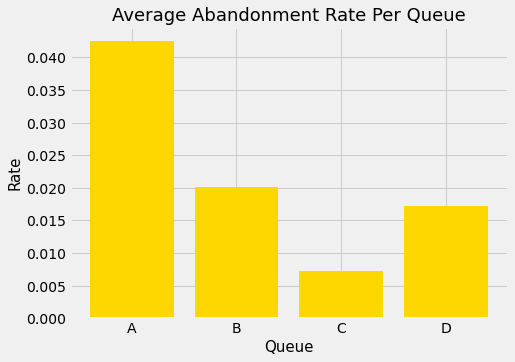

In [71]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    
#print dictionary
abandonment_rates

#Create variables and lists for keys and values
queue=list(abandonment_rates.keys())
rates=list(abandonment_rates.values())

#Check keys and values
queue
rates

#Create a smiple bar chart to visualize the avergae abandonment rate for each queue

#Chart style
style.use('fivethirtyeight')

#Chart size
plt.subplots(figsize=(7,5))
plt.bar(queue,rates, color='gold') 

#Adding the aesthetics
plt.title('Average Abandonment Rate Per Queue',color = 'black', fontsize=18)
plt.xlabel('Queue', fontsize=15, color='black')
plt.ylabel('Rate', fontsize=15, color='black') 

#Save figure
plt.savefig('abandonment_rates_bar.png')

#Show the plot
plt.show()


### 2. What is the service level and average speed of answer per each rep?

**Total Company**

In [72]:
#df.columns

In [73]:
# The average speed of answer of each rep
#Incoming wait times only excludes outgoing calls

df_plt = df.groupby(["Branch","Rep ID"])["Incoming Wait Time Only"].mean().to_frame().reset_index()
print('Average speed of answer for all reps:\n')
df_plt.sort_values('Incoming Wait Time Only', ascending=True)


# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

quick_calls =df[df["Incoming Wait Time Only"]<= 2.0]
quick_reps = quick_calls[["Branch", "Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Branch", "Rep ID"]).sum()  # Final Table
print("\nTotal Personal Service Level Percentage:\n")
quick_stats.sort_values('Calls',ascending=False)



# Table 2: Total Incoming Calls Only - grouped by Rep

total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Branch", "Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Branch", "Rep ID"]).sum() # Final Table 

print("\n Total Incoming Calls Only grouped by Rep:\n")
total_stats.sort_values('Calls',ascending=False)


#  Table 3: Service Level Percentage created via merge
#service_level = pd.merge(quick_stats, total_stats, on="Rep ID").reset_index()

service_level = pd.merge(quick_stats, total_stats, on=["Branch","Rep ID"]).reset_index()



# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

service_level.sort_values('Service Level %', ascending=False).round(2)

type(service_level)
type(df_plt)


Average speed of answer for all reps:



,Branch,Rep ID,Incoming Wait Time Only
2,North,Brent,2.125000
0,North,Amanda,2.400000
9,South,Alice,2.500000
10,South,Eric,2.611111
17,South,Sandy,2.615385
4,North,Duke,2.785714
14,South,Karl,2.888889
3,North,Cam,2.909091
19,South,Susan,2.916667
16,South,Randy,2.937500



Total Personal Service Level Percentage:



Calls
Branch Rep ID       
South  Eric       10
       Randy       7
       Sandy       7
North  Brent       6
       Duke        6
South  Susan       5
North  Cam         5
       Lilly       4
South  George      4
       Alice       3
North  Andy        3
South  Helga       3
       Karl        3
       Kate        3
North  Amanda      3
       Todd        2
       Xander      2
South  Josh        2
North  Joe         2
South  Sharon      1


 Total Incoming Calls Only grouped by Rep:



Calls
Branch Rep ID       
South  Eric       18
       Randy      16
North  Duke       14
South  Sandy      13
       George     13
North  Lilly      12
South  Susan      12
       Helga      11
North  Cam        11
       Andy       10
South  Kate       10
North  Joe         9
South  Josh        9
       Karl        9
North  Brent       8
South  Sharon      8
North  Todd        6
       Xander      6
South  Alice       6
North  Amanda      5

,Branch,Rep ID,Calls_x,Calls_y,Service Level %
2,North,Brent,6,8,75.00
0,North,Amanda,3,5,60.00
10,South,Eric,10,18,55.56
17,South,Sandy,7,13,53.85
9,South,Alice,3,6,50.00
3,North,Cam,5,11,45.45
16,South,Randy,7,16,43.75
4,North,Duke,6,14,42.86
19,South,Susan,5,12,41.67
8,North,Xander,2,6,33.33


pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

**Service Level per branch**

In [74]:
south_service_level=service_level.groupby("Branch").get_group('South').sort_values('Service Level %', ascending=False).round(2)

north_service_level=service_level.groupby("Branch").get_group('North').sort_values('Service Level %', ascending=False).round(2)

north_service_level
south_service_level


#Avg Speed of answer per branch

south_speed=df_plt.groupby("Branch").get_group('South').sort_values('Incoming Wait Time Only', ascending=True)

north_speed=df_plt.groupby("Branch").get_group('North').sort_values('Incoming Wait Time Only', ascending=True)


north_speed
south_speed

north_avg=north_speed.mean()
south_avg=south_speed.mean()

,Branch,Rep ID,Calls_x,Calls_y,Service Level %
2,North,Brent,6,8,75.00
0,North,Amanda,3,5,60.00
3,North,Cam,5,11,45.45
4,North,Duke,6,14,42.86
6,North,Lilly,4,12,33.33
7,North,Todd,2,6,33.33
8,North,Xander,2,6,33.33
1,North,Andy,3,10,30.00
5,North,Joe,2,9,22.22


,Branch,Rep ID,Calls_x,Calls_y,Service Level %
10,South,Eric,10,18,55.56
17,South,Sandy,7,13,53.85
9,South,Alice,3,6,50.00
16,South,Randy,7,16,43.75
19,South,Susan,5,12,41.67
14,South,Karl,3,9,33.33
11,South,George,4,13,30.77
15,South,Kate,3,10,30.00
12,South,Helga,3,11,27.27
13,South,Josh,2,9,22.22


,Branch,Rep ID,Incoming Wait Time Only
2,North,Brent,2.125000
0,North,Amanda,2.400000
4,North,Duke,2.785714
3,North,Cam,2.909091
6,North,Lilly,3.083333
8,North,Xander,3.333333
7,North,Todd,3.500000
5,North,Joe,3.555556
1,North,Andy,3.600000


,Branch,Rep ID,Incoming Wait Time Only
9,South,Alice,2.500000
10,South,Eric,2.611111
17,South,Sandy,2.615385
14,South,Karl,2.888889
19,South,Susan,2.916667
16,South,Randy,2.937500
11,South,George,3.153846
12,South,Helga,3.272727
15,South,Kate,3.400000
13,South,Josh,3.444444


**Average speed of answer per each rep-Visualization**

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'North Average Speed of answer')

Text(0, 0.5, 'Average Incoming Wait time only- in secs')

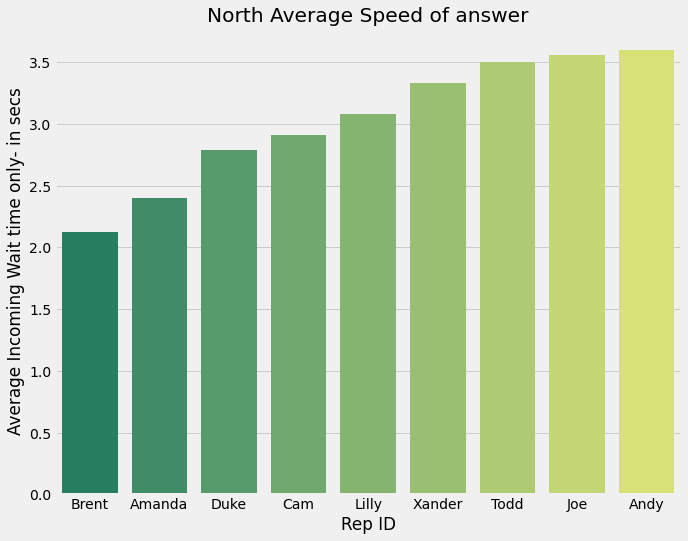

Text(0.5, 1.0, 'South Average Speed of answer')

Text(25.20000000000001, 0.5, 'Average Incoming Wait time only- in secs')

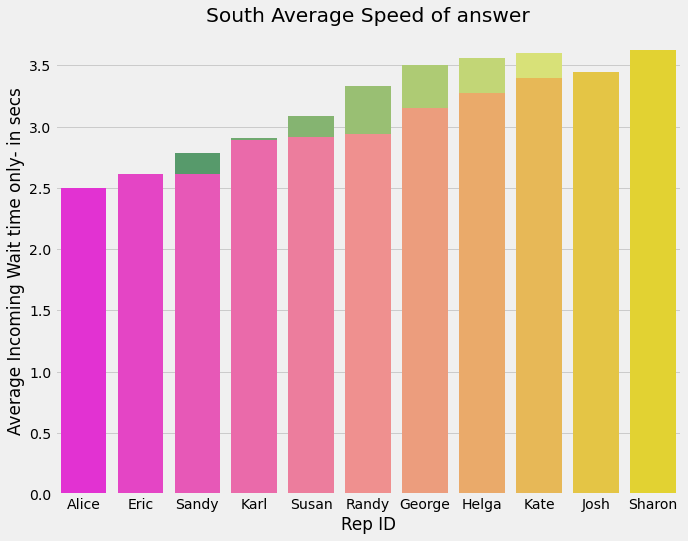

In [75]:
#North Avg per rep
plt.figure(1, figsize=(10, 8))
plt.title("North Average Speed of answer")
ax = sns.barplot(x = "Rep ID", y="Incoming Wait Time Only", data=north_speed, palette="summer")
plt.ylabel('Average Incoming Wait time only- in secs')

#South Avg per rep
plt.figure(1, figsize=(10, 8))
plt.title("South Average Speed of answer")
ax = sns.barplot(x = "Rep ID", y="Incoming Wait Time Only", data=south_speed, palette="spring")
plt.ylabel('Average Incoming Wait time only- in secs')



Overall north average speed of answer: Incoming Wait Time Only    3.032447
dtype: float64

Overall north average speed of answer: Incoming Wait Time Only    3.033234
dtype: float64




Text(0, 0.5, 'Average Speed of answer per Branch-in secs')

Text(0.5, 1.0, 'Average speed of answer Branch comparison')

[Text(0, 3, '3.0324')]

[Text(0, 3, '3.0332')]

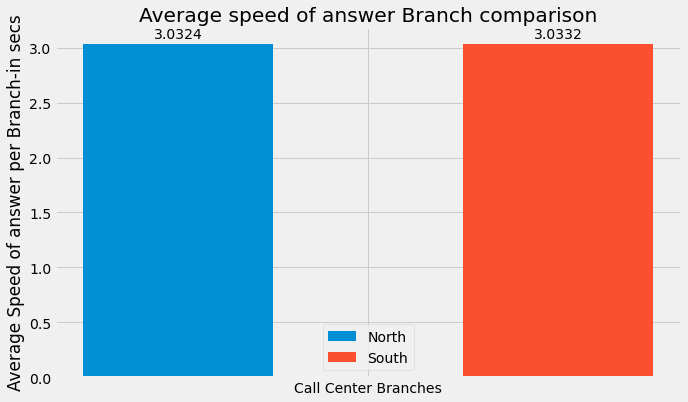

In [76]:
print("\nOverall north average speed of answer:", north_avg)
print("\nOverall north average speed of answer:", south_avg)

print("\n")

#Comparison avg per branch

labels = ['Call Center Branches']
north_means = north_avg.round(4)
south_means = south_avg.round(4)

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/1, north_means, width, label='North')
rects2 = ax.bar(x + width/1, south_means, width, label='South')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Speed of answer per Branch-in secs')
ax.set_title('Average speed of answer Branch comparison')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()

<AxesSubplot:xlabel='Service Level %', ylabel='Incoming Wait Time Only'>

Text(0.5, 1.0, 'Service Level and Avg Answer Time per Rep')

Text(0.5, 0, 'Rep ID')

Text(0, 0.5, 'Average Answer Time-secs')

Text(0, 0.5, 'Service Level %')

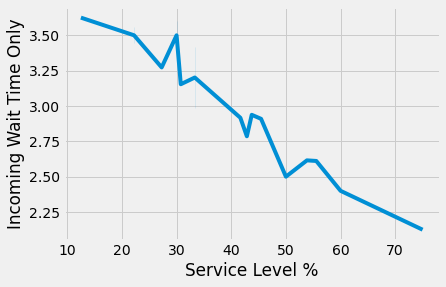

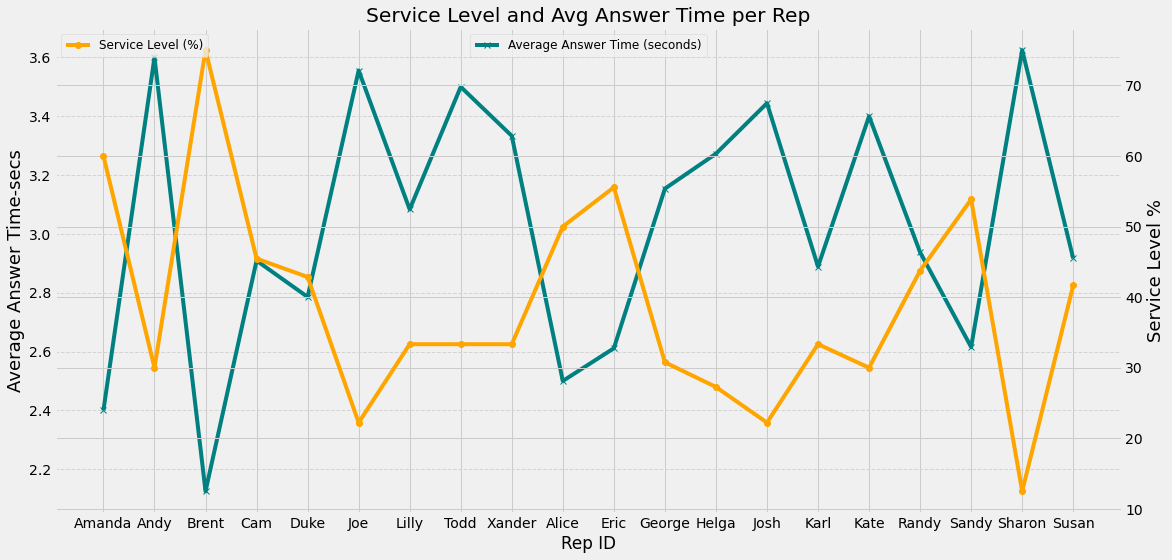

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [93]:
sns.lineplot(x=service_level["Service Level %"], y=df_plt['Incoming Wait Time Only'])


fig, ax = plt.subplots(figsize=(16.5,8))
ax2 = ax.twinx()

ax.set_title('Service Level and Avg Answer Time per Rep')
ax.set_xlabel('Rep ID')

ax.plot(df_plt['Rep ID'], df_plt['Incoming Wait Time Only'], color='teal', marker='x')
ax2.plot(service_level['Rep ID'], service_level['Service Level %'], color='orange', marker='o')

ax.set_ylabel('Average Answer Time-secs', fontsize=18)
ax2.set_ylabel('Service Level %', fontsize=18)

ax.legend(['Average Answer Time (seconds)'], loc=9, fontsize=12)
ax2.legend(['Service Level (%)'], loc=2, fontsize=12)

ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

print(plt.style.available)

This chart shows the service level and average speed of answer for each rep. Here it is easy to see that the reps with a higher avg speed of answer, have lower service levels as expected.

### Service level % comparison

<Figure size 1188x576 with 0 Axes>

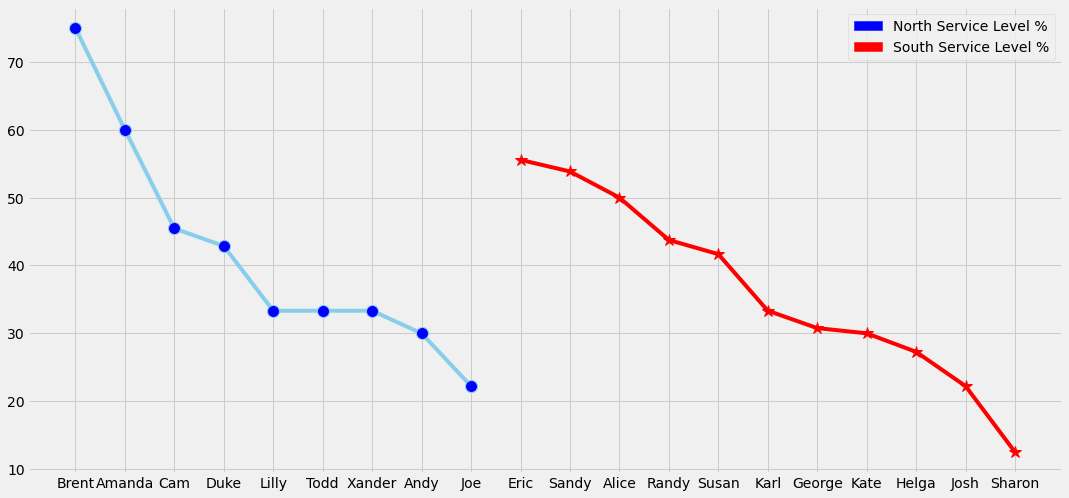

In [91]:
# multiple line plots
plt.figure(1, figsize=(16.5, 8))
plt.plot( 'Rep ID', 'Service Level %', data=north_service_level, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Rep ID', 'Service Level %', data=south_service_level, marker='*',markerfacecolor='red', markersize=12, color='red', linewidth=4)
#plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# show legend

import matplotlib.patches as mpatches


blue_patch = mpatches.Patch(color='blue', label='North Service Level %')
red_patch = mpatches.Patch(color='red', label='South Service Level %')



plt.legend(handles=[blue_patch, red_patch])

#plt.legend()

# show graph
plt.show()

The higher the average incoming wait time, the lower the service level%. 

**When looking at individual reps, the North generally has a better service level % than south**

In [79]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

NameError: name 'purpose_group' is not defined

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
abandonment_rates




For visualization 1, I'm using a simple bar chart from matplotlib to make it easy to see the value difference across the queues.

names = list(abandonment_rates.keys())
values = list(abandonment_rates.values())
plt.bar(range(len(abandonment_rates)), values, tick_label=names, color ='teal', width = 0.5)
plt.xlabel('Queue')
plt.ylabel('Abandoment Rate')
plt.title('Abandonment Rates by Queue')
plt.show()


# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


service_level = service_level.sort_values("Service Level %", ascending=False)
service_level




# For visualization 2, I'm using a seaborn bar chart to show service level % by rep.
# I sorted by Service Level % and used a gradient to help easily see who is performing well and not as well.
service_level = pd.DataFrame(service_level.reset_index())
ax = sns.barplot(x = "Rep ID", y="Service Level %", data=service_level, palette="Blues_d")




# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

# NOTE: The "purpose_group" variable is not defined - so this provided code isn't working.
#purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
#complaints = purpose_counts["Complaint"].to_dict()
#sales_support = purpose_counts["Sales Support"].to_dict()
#product_support = purpose_counts["Product Support"].to_dict()
# Not the stated visualization code, but pulls the needed data for one.
purpose_group_1 = df.melt(id_vars="Incoming or Outgoing", value_vars="Call Purpose", value_name="Purpose")
purpose_group_counts = purpose_group_1.groupby(["Incoming or Outgoing", "Purpose"])
purpose_group_counts = pd.DataFrame(purpose_group_counts.size().reset_index(name="Count"))
purpose_group_counts



# For visualization 3, I'm using a grouped bar chart to show the number of calls per purpose for incoming and outgoing.
sns.set_palette("Paired")
sns.set_style("whitegrid")
ax = sns.barplot(x="Incoming or Outgoing", y="Count", hue="Purpose", data=purpose_group_counts)

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:


Unused codes

In [ ]:
#pp.ProfileReport(df)


# north_df_copy.groupby('Incoming Wait Time').size()
# print('North\n')

# south_df_copy.groupby('Incoming Wait Time').size()

# print('South\n')


# df.groupby('Incoming Wait Time').size()
# print("Total")





# north_df_copy.loc[north_df_copy['Incoming Wait Time'] <= 2, 'Incoming Wait Time'].value_counts(normalize=True).mul(100).round(1).astype(str)+ '%'

# south_df_copy.loc[south_df_copy['Incoming Wait Time'] <= 2, 'Incoming Wait Time'].value_counts(normalize=True).mul(100).round(1).astype(str)+ '%'


# df.loc[df['Incoming Wait Time'] <= 2, 'Incoming Wait Time'].value_counts(normalize=True).mul(100).round(1).astype(str)+ '%'



# north_df_copy['Incoming Wait Time'].value_counts().sort_index(ascending=True) 
# #Sort index values from lowest to highest. .sort_values(ascending=True) #to sort values from lowest to highest

# north_df_copy['Incoming Wait Time'].value_counts(normalize=True) #automatically calculates percent
# north_df_copy['Incoming Wait Time'].value_counts(normalize=True).mul(100).round(1).astype(str)+ '%'


#**********


#What is the percentage of calls answered within 2 seconds for each company and the entire company?
    

    
# #North
# print("North-% of Incoming call wait times sorted by seconds:")
# north_iwto.value_counts().sort_index(ascending=True)/north_iwto.count()*100


# #North calls answered within 2 seconds
# north_2sec= north_iwto <=2
# print ("North Incoming wait times within 2 secs:\t") 
       
# north_2sec.value_counts(normalize=True).mul(100).round(1).astype(str)+ '%'

# print("\n")



# #South
# print("South-% of Incoming call wait times sorted by seconds:")
# south_iwto.value_counts().sort_index(ascending=True)/south_iwto.count()*100

# #South calls answered within 2 seconds
# south_2sec= south_iwto <=2
# print ("South Incoming wait times within 2 secs:\t") 
       
# south_2sec.value_counts(normalize=True).mul(100).round(1).astype(str)+ '%'

# print("\n")

# #Total

# print('Total company wide % of Incoming call wait times sorted by seconds:')
       
# df_iwto.value_counts().sort_index(ascending=True)/df_iwto.count()*100

# #Total calls under 2 seconds
# total_2sec= df_iwto <=2
# print ("Total Incoming wait times within 2 secs:\t") 
       
# total_2sec.value_counts(normalize=True).mul(100).round(1).astype(str)+ '%'

# print("\n")

# print ("North Incoming wait time service level:\t") 

# (north_2sec.sum()/north_iwto.sum())*100

# print ("South Incoming wait time service level:\t") 

# (south_2sec.sum()/south_iwto.sum())*100

# print ("Total Incoming wait time service level:\t") 

# (total_2sec.sum()/df_iwto.sum())*100




######## Visualization

#North only

# # Create visualization 2 here
# # north_plt contains the data you need for the average speed of answer of each rep
# #north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# north_plt = north_df_copy.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
# print('Average speed of answer for north reps:\n')
# north_plt.sort_values('Incoming Wait Time', ascending=True)


# # Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls
# # Table 1: Total Incoming calls less than 2 seconds grouped by Rep
# #quick_calls = north[north["Incoming Wait Time"] <= 2.0]

# quick_calls =north_df_copy[north_df_copy["north_iwto"]<= 2.0]
# quick_reps = quick_calls[["Rep ID", "Calls"]]
# quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
# print("\nNorth  Personal Service Level Percentage:\n")
# quick_stats.sort_values('Calls',ascending=False)



# # Table 2: Total Incoming Calls Only - grouped by Rep
# #total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]


# total_calls_in = north_df_copy[north_df_copy["Incoming or Outgoing"] == "Incoming"]
# rep_calls = total_calls_in[["Rep ID", "Calls"]]     
# total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table 

# print("\nNorth Total Incoming Calls Only grouped by Rep:\n")
# total_stats.sort_values('Calls',ascending=False)


# #  Table 3: Service Level Percentage created via merge
# service_level = pd.merge(quick_stats, total_stats, on="Rep ID")


# # Create Percentage Column in Table 3
# service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# service_level.sort_values('Service Level %', ascending=False)

